# Section1 : Playing with Python and Numpy

In [28]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Matrix Multiplication

In [2]:
#Check if matrix multiplication is valid
def isValid(A,B):
    dimA=np.shape(A)
    dimB=np.shape(B)
    if dimA[1]==dimB[0]:
        return 1
    else:
        return 0

In [3]:
#matrix multiplication using numpy
def matrix_multiply_2(A,B):
    AmultB=A@B
    return AmultB

In [4]:
#matrix multiplication using loops
def matrix_multiply(A,B):
    dimA=A.shape
    dimB=B.shape
    p=np.zeros((4,3))
    for i in range(4):
        for j in range(3):
            for k in range(3):
                p[i,j]+=A[i,k]*B[k,j]
    return p.astype(int)  
                

In [5]:
#testing the code
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

B = np.array([
    [13, 14, 15],
    [16, 17, 18],
    [19, 20, 21]
])

if isValid(A,B):
    print(f"Result using loops: {matrix_multiply(A,B)}")
    print(f"Result using numpy: {matrix_multiply_2(A,B)}")
else:
    print(f"Matrix multiplication is not valid")

Result using loops: [[102 108 114]
 [246 261 276]
 [390 414 438]
 [534 567 600]]
Result using numpy: [[102 108 114]
 [246 261 276]
 [390 414 438]
 [534 567 600]]


## Z-Score Normalisation


In [6]:
#without using numpy
def mean(x):
    tot_sum=np.sum(x)
    n=len(x)
    mean1=tot_sum/n
    return mean1    
def standard_deviation(x):
    sum=0
    mean1=mean(x)
    for i in x:
        diff_sq=(mean1-i)**2
        sum+=diff_sq
    sd=(sum/len(x))**0.5
    return sd
def zscore_normalisation(x):
    mean1=mean(x)
    sd=standard_deviation(x)
    for i in range(len(x)):
        x[i]=(x[i]-mean1)/sd
    return x    
      

In [7]:
#using numpy
def zscore_normalisation_2(x):
    mean1=np.mean(x)
    sd=np.std(x)
    for i in range(len(x)):
        x[i]=(x[i]-mean1)/sd
    return x 
    

In [8]:
#testing the code
x = [4, 7, 7, 15, 32, 47, 63, 89, 102, 131]
print(f"Result without using numpy: {zscore_normalisation(x)}")
print(f"Result using numpy: {zscore_normalisation_2(x)}")

Result without using numpy: [-1.0675326683028088, -0.9974539373420117, -0.9974539373420117, -0.8105773214465528, -0.41346451266870277, -0.06307085786471743, 0.3106823739262003, 0.9180313755864415, 1.2217058764165623, 1.8991336090376005]
Result using numpy: [-1.0675326683028088, -0.9974539373420116, -0.9974539373420116, -0.8105773214465527, -0.41346451266870266, -0.06307085786471735, 0.3106823739262004, 0.9180313755864417, 1.2217058764165623, 1.8991336090376005]


## Sigmoid fn and its derivative

In [9]:
#defining sigmoid function
def sigmoidfn(x):
    dim=np.shape(x)
    s=np.zeros((dim[0],dim[1]))
    for i in range(dim[0]):
        for j in range(dim[1]):
            s[i,j]=1/(1+math.exp(-x[i,j]))
    return s
#function to implement derivative of sigmoid
def derivative(x):
    dim=np.shape(x)
    s=np.zeros((dim[0],dim[1]))
    for i in range(dim[0]):
        for j in range(dim[1]):
            s[i,j]=math.exp(x[i,j])/(1+math.exp(x[i,j]))**2
    return s
#testing the code
x = np.array([
    [9,2,5,0,0],
    [7,5,0,0,0]
])
print(f"x on applying sigmoid activation fn is: {sigmoidfn(x)}")
print(f"x on applying derivative of sigmoid activation fn is: {derivative(x)}")

x on applying sigmoid activation fn is: [[0.99987661 0.88079708 0.99330715 0.5        0.5       ]
 [0.99908895 0.99330715 0.5        0.5        0.5       ]]
x on applying derivative of sigmoid activation fn is: [[1.23379350e-04 1.04993585e-01 6.64805667e-03 2.50000000e-01
  2.50000000e-01]
 [9.10221180e-04 6.64805667e-03 2.50000000e-01 2.50000000e-01
  2.50000000e-01]]


# Section 2: Playing with Pandas

In [10]:
import pandas as pd
path=r"C:\Users\pupu1\OneDrive\Desktop\superheated_vapor_properties.csv"
#read the csv file
df=pd.read_csv(path)
#display the shape of the data frame
print(df.shape)
#Return an array containing names of all the columns
column_value=df.columns.values
print(f"the array containing names of all columns is:{column_value}")
#Display the number of null values in each column of the dataframe
null_val=df.isnull().sum()
print(f"""The numbe of null values in each column is-
{null_val}""")
#create a column- 'property at pressure'
df['Property at Pressure']=df['Property'] + " at " + df['Pressure'].astype(str)
idx1=df[df['Property at Pressure']=='V at 10.0'].index
print(f"V at 10kpa and 75 degree c is {df['75'].loc[idx1].item()}")
idx2=df[df['Property at Pressure']=='H at 75.0'].index 
print(f"H at 75kpa and 300 degrre c is {df['300'].loc[idx2].item()}")
idx3=df[df['Property at Pressure']=='S at 250.0'].index 
print(f"S at 250kpa and 220 degree c is {df['220'].loc[idx3].item()}")
col_=np.max(null_val)
for i in range(np.shape(null_val)[0]):
    if null_val[i]==col_:
        print(f"the column with highest number of missing entries is '{df.columns[i]}'" )
print(f"The mean of pressure of saturated liquid at various pressures is {df['Liq_Sat'].iloc[2::4].mean()}")


(544, 37)
the array containing names of all columns is:['Pressure' 'Property' 'Liq_Sat' 'Vap_Sat' '75' '100' '125' '150' '175'
 '200' '220' '225' '240' '250' '260' '275' '280' '290' '300' '320' '325'
 '340' '350' '360' '375' '380' '400' '425' '450' '475' '500' '525' '550'
 '575' '600' '625' '650']
The numbe of null values in each column is-
Pressure      0
Property      0
Liq_Sat       0
Vap_Sat       0
75          528
100         508
125         488
150         448
175         384
200         320
220         408
225         400
240         408
250         344
260         384
275         340
280         380
290         488
300          60
320         480
325         136
340         476
350          68
360         476
375         204
380         476
400           0
425         204
450           0
475         204
500           0
525         272
550           0
575         340
600           0
625         476
650           0
dtype: int64
V at 10kpa and 75 degree c is 16030.0
H at 75kpa and

In [11]:
V_data={}
pd.DataFrame(V_data)
V_data=df.iloc[0::4,0::1]
V_data.index=V_data.index/4
print(V_data)

       Pressure Property  Liq_Sat     Vap_Sat        75       100       125  \
0.0         1.0        V    1.000  129200.000  160640.0  172180.0  183720.0   
1.0        10.0        V    1.010   14670.000   16030.0   17190.0   18350.0   
2.0        20.0        V    1.017    7649.800    8000.0    8584.7    9167.1   
3.0        30.0        V    1.022    5229.300    5322.0    5714.4    6104.6   
4.0        40.0        V    1.027    3993.400       NaN    4279.2    4573.3   
...         ...      ...      ...         ...       ...       ...       ...   
131.0   10600.0        V    1.474      16.778       NaN       NaN       NaN   
132.0   10800.0        V    1.481      16.385       NaN       NaN       NaN   
133.0   11000.0        V    1.489      16.006       NaN       NaN       NaN   
134.0   11200.0        V    1.496      15.639       NaN       NaN       NaN   
135.0   11400.0        V    1.504      15.284       NaN       NaN       NaN   

            150       175       200  ...         45

In [12]:
H_data={}
pd.DataFrame(H_data)
H_data=df.iloc[2::4,0::1]
H_data.index=(H_data.index-2)/4
print(H_data)

       Pressure Property   Liq_Sat  Vap_Sat      75     100     125     150  \
0.0         1.0        H    29.335   2514.4  2641.5  2688.6  2736.0  2783.7   
1.0        10.0        H   191.832   2584.8  2640.0  2687.5  2735.2  2783.1   
2.0        20.0        H   251.453   2609.9  2638.4  2686.3  2734.2  2782.3   
3.0        30.0        H   289.302   2625.4  2636.8  2685.1  2733.3  2781.6   
4.0        40.0        H   317.650   2636.9     NaN  2683.8  2732.3  2780.9   
...         ...      ...       ...      ...     ...     ...     ...     ...   
131.0   10600.0        H  1433.700   2716.9     NaN     NaN     NaN     NaN   
132.0   10800.0        H  1442.200   2713.1     NaN     NaN     NaN     NaN   
133.0   11000.0        H  1450.600   2709.3     NaN     NaN     NaN     NaN   
134.0   11200.0        H  1458.900   2705.4     NaN     NaN     NaN     NaN   
135.0   11400.0        H  1467.200   2701.5     NaN     NaN     NaN     NaN   

          175     200  ...     450     475     500 

In [13]:
U_data={}
pd.DataFrame(U_data)
U_data=df.iloc[1::4,0::1]
U_data.index=(U_data.index-1)/4
print(U_data)

       Pressure Property   Liq_Sat  Vap_Sat      75     100     125     150  \
0.0         1.0        U    29.334   2385.2  2480.8  2516.4  2552.3  2588.5   
1.0        10.0        U   191.822   2438.0  2479.7  2515.6  2551.6  2588.0   
2.0        20.0        U   251.432   2456.9  2478.4  2514.6  2550.9  2587.4   
3.0        30.0        U   289.271   2468.6  2477.1  2513.6  2550.2  2586.8   
4.0        40.0        U   317.609   2477.1     NaN  2512.6  2549.4  2586.2   
...         ...      ...       ...      ...     ...     ...     ...     ...   
131.0   10600.0        U  1418.100   2539.0     NaN     NaN     NaN     NaN   
132.0   10800.0        U  1426.200   2536.2     NaN     NaN     NaN     NaN   
133.0   11000.0        U  1434.200   2533.2     NaN     NaN     NaN     NaN   
134.0   11200.0        U  1442.100   2530.3     NaN     NaN     NaN     NaN   
135.0   11400.0        U  1450.000   2527.2     NaN     NaN     NaN     NaN   

          175     200  ...     450     475     500 

In [14]:
S_data={}
pd.DataFrame(S_data)
S_data=df.iloc[0::4,0::1]
S_data.index=(S_data.index-3)/4
print(S_data)

         Pressure Property  Liq_Sat     Vap_Sat        75       100       125  \
-0.75         1.0        V    1.000  129200.000  160640.0  172180.0  183720.0   
 0.25        10.0        V    1.010   14670.000   16030.0   17190.0   18350.0   
 1.25        20.0        V    1.017    7649.800    8000.0    8584.7    9167.1   
 2.25        30.0        V    1.022    5229.300    5322.0    5714.4    6104.6   
 3.25        40.0        V    1.027    3993.400       NaN    4279.2    4573.3   
...           ...      ...      ...         ...       ...       ...       ...   
 130.25   10600.0        V    1.474      16.778       NaN       NaN       NaN   
 131.25   10800.0        V    1.481      16.385       NaN       NaN       NaN   
 132.25   11000.0        V    1.489      16.006       NaN       NaN       NaN   
 133.25   11200.0        V    1.496      15.639       NaN       NaN       NaN   
 134.25   11400.0        V    1.504      15.284       NaN       NaN       NaN   

              150       175

# Section 3: PLotting the PLOTS

## Plot the properties vs Pressure for saturated liquid.

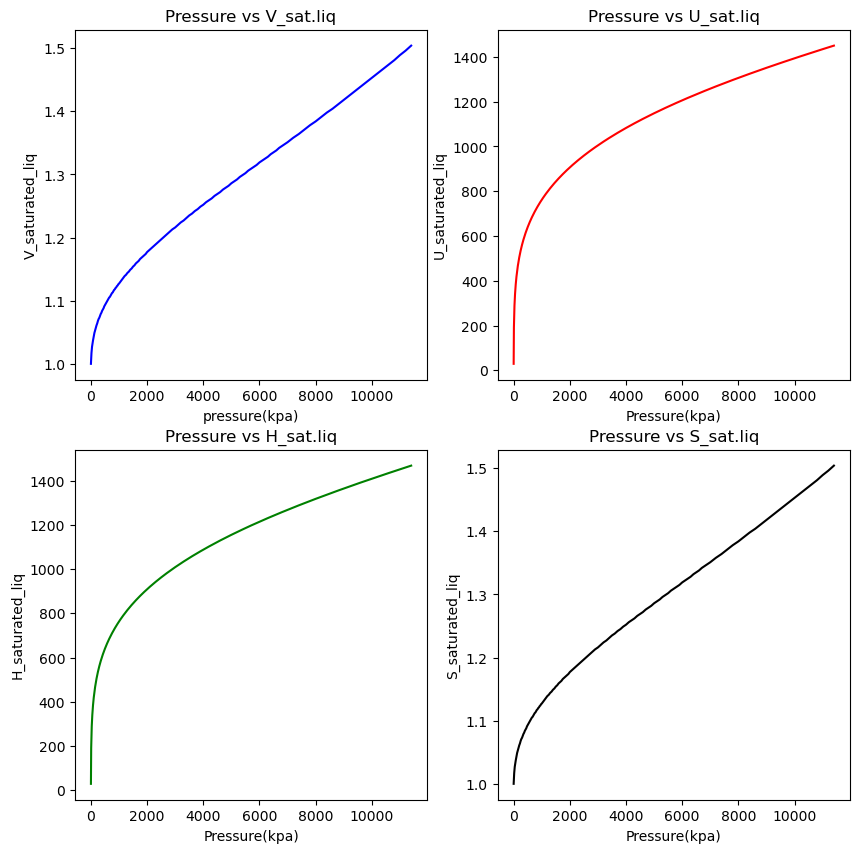

In [15]:
plt.figure(figsize=(10, 10))

#V_sat vs Pressure
plt.subplot(2,2,1)
plt.title('Pressure vs V_sat.liq')
plt.plot(V_data['Pressure'],V_data['Liq_Sat'],'-b')
plt.xlabel('pressure(kpa)')
plt.ylabel('V_saturated_liq')

#U_sat vs Pressure
plt.subplot(2,2,2)
plt.title('Pressure vs U_sat.liq')
plt.plot(U_data['Pressure'],U_data['Liq_Sat'],'-r')
plt.xlabel('Pressure(kpa)')
plt.ylabel('U_saturated_liq')

#H_sat vs Pressure
plt.subplot(2,2,3)
plt.title('Pressure vs H_sat.liq')
plt.plot(H_data['Pressure'],H_data['Liq_Sat'],'-g')
plt.xlabel('Pressure(kpa)')
plt.ylabel('H_saturated_liq')

#S_sat vs Pressure
plt.subplot(2,2,4)
plt.title('Pressure vs S_sat.liq')
plt.plot(V_data['Pressure'],S_data['Liq_Sat'],'-k')
plt.xlabel('Pressure(kpa)')
plt.ylabel('S_saturated_liq')
plt.show()

## Plot the specific volume of saturated liquid between 300 kPa and 1500 kPa

In [16]:
plot_data={}
pd.DataFrame(plot_data)
mask=(V_data['Pressure'] >= 300) & (V_data['Pressure'] <= 1500)
selected_column = ['Pressure','Liq_Sat']  
sliced_data = V_data.loc[mask, selected_column]

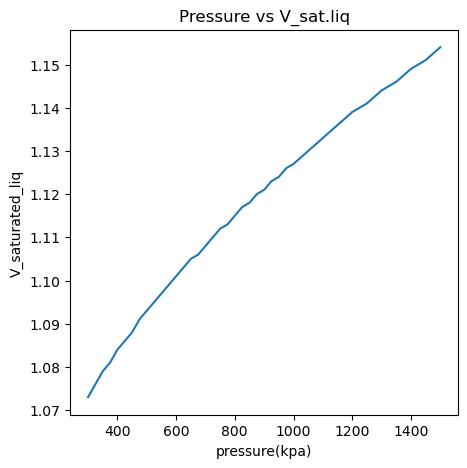

In [17]:
plt.figure(figsize=(5, 5))
plt.plot(sliced_data['Pressure'],sliced_data['Liq_Sat'])
plt.title('Pressure vs V_sat.liq')
plt.xlabel('pressure(kpa)')
plt.ylabel('V_saturated_liq')
plt.show()

## Linear Regression

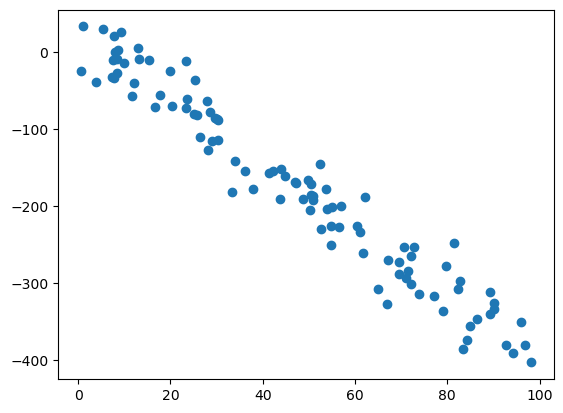

In [29]:
 # Generation of data points
x = np.random.rand(100)*100
y = -4*x+15
y = y+np.random.randn(100)*30
plt.scatter(x,y)

In [33]:
m=0
c=10
learning_rate=0.0001
def cost_fn(m,c):
    error=((y-m*x-c)**2)
    error=np.sum(error)/len(x)
    return error
def delta_m_fn(m,c):
    delta=-2*(x)*(y-m*x-c)
    delta=np.sum(delta)/len(x)
    return delta
def delta_c_fn(m,c):
    delta=-2*(y-m*x-c)
    delta=np.sum(delta)/len(x)
    return delta

In [34]:
for i in range(10000):
    m=m-delta_m_fn(m,c)*learning_rate
    c=c-delta_c_fn(m,c)*learning_rate
print(f"the values of m and c are {m} and {c} respectively")    

the values of m and c are -4.103246657608941 and 15.906719193862612 respectively
